In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
data = pd.read_csv('digit-recognizer/train.csv')


In [250]:
data = np.array(data)

In [251]:
data.shape


(42000, 785)

In [252]:
m, n = data.shape

In [253]:
np.random.shuffle(data)

In [254]:
print(data)

[[7 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [255]:
print(data[5])

[  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 124 250
 254 254 255 163  93  18   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  10 167 253 253 253 253 253 253 253 253 156  81
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  97 253
 253 227 189  82 164 241 253 253 253 224   0   0   

label= 7


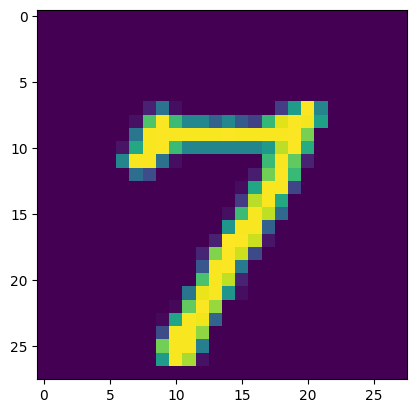

In [256]:
image = data[342][1:].reshape((28,28))
print("label=", data[342][0])
plt.imshow(image, interpolation='nearest')
plt.show()

In [257]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [258]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [259]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [260]:
def ReLU(Z):
    return(np.maximum(0, Z))

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

In [261]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [262]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [263]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [264]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [265]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.20, 1400)


Iteration:  0
[8 8 8 ... 1 1 8] [3 1 3 ... 8 9 1]
0.12414634146341463
Iteration:  10
[8 0 3 ... 1 2 0] [3 1 3 ... 8 9 1]
0.2581219512195122
Iteration:  20
[3 8 3 ... 1 2 8] [3 1 3 ... 8 9 1]
0.3916829268292683
Iteration:  30
[3 2 3 ... 1 2 2] [3 1 3 ... 8 9 1]
0.505
Iteration:  40
[3 2 3 ... 1 2 2] [3 1 3 ... 8 9 1]
0.5811219512195122
Iteration:  50
[3 2 3 ... 1 2 2] [3 1 3 ... 8 9 1]
0.6292439024390244
Iteration:  60
[3 1 3 ... 1 9 2] [3 1 3 ... 8 9 1]
0.6656585365853659
Iteration:  70
[3 1 3 ... 1 9 2] [3 1 3 ... 8 9 1]
0.6927073170731707
Iteration:  80
[3 1 3 ... 1 9 2] [3 1 3 ... 8 9 1]
0.7140975609756097
Iteration:  90
[3 1 3 ... 1 9 1] [3 1 3 ... 8 9 1]
0.7308780487804878
Iteration:  100
[3 1 3 ... 1 9 1] [3 1 3 ... 8 9 1]
0.7461707317073171
Iteration:  110
[3 1 3 ... 3 9 1] [3 1 3 ... 8 9 1]
0.7579756097560976
Iteration:  120
[3 1 3 ... 3 9 1] [3 1 3 ... 8 9 1]
0.7677073170731707
Iteration:  130
[3 1 3 ... 3 9 1] [3 1 3 ... 8 9 1]
0.7761707317073171
Iteration:  140
[3 1 3 ... 3 

In [289]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    #print(X_train[:, index, None])
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  5


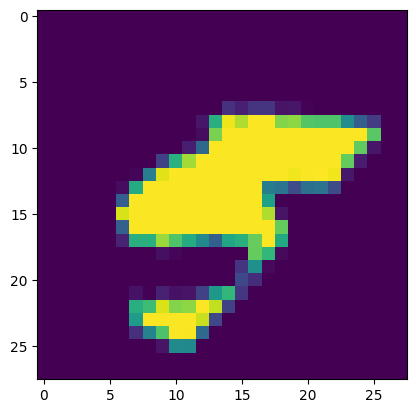

Prediction:  [3]
Label:  3


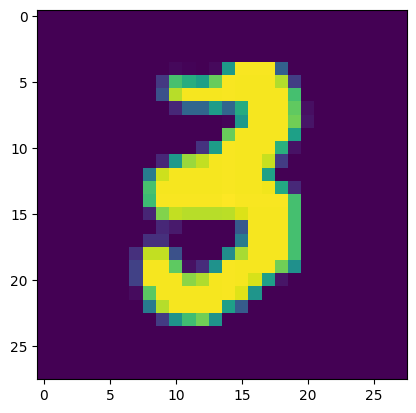

Prediction:  [2]
Label:  2


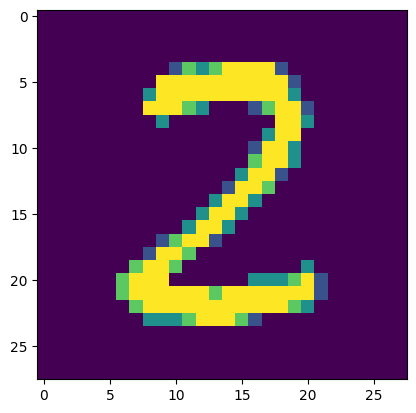

Prediction:  [3]
Label:  3


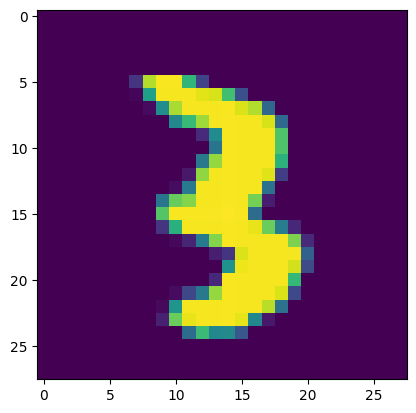

In [290]:
test_prediction(7, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(89, W1, b1, W2, b2)
test_prediction(24, W1, b1, W2, b2)

In [279]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 0 4 1 1 9 7 2 1 6 9 5 3 6 3 7 7 2 7 5 3 9 4 8 1 8 1 9 8 4 1 7 8 8 5 0 6
 4 0 8 8 7 9 6 3 5 0 4 7 3 3 1 0 1 7 1 0 3 3 3 3 8 3 9 1 6 5 5 1 4 7 3 0 1
 6 9 9 8 0 9 1 8 3 5 5 9 1 0 7 4 9 3 4 1 4 7 1 6 3 7 3 5 6 8 4 3 7 8 4 7 3
 8 5 9 5 4 2 9 6 1 3 9 4 3 0 3 5 3 1 2 6 0 5 0 9 5 7 7 0 2 8 2 1 7 3 8 6 4
 7 6 9 7 0 2 3 3 0 9 8 5 8 6 7 5 8 1 9 9 0 2 9 3 3 0 5 1 1 0 0 5 1 3 4 1 7
 3 8 7 5 6 6 7 2 9 0 3 1 0 6 0 3 4 0 3 8 8 3 5 6 1 5 6 1 9 5 3 8 3 5 0 0 2
 3 9 4 4 1 6 8 1 5 8 2 7 5 6 5 6 9 1 3 6 1 3 5 9 0 3 5 5 4 2 7 7 0 4 5 7 1
 4 3 4 6 1 7 4 7 7 1 8 1 0 9 1 3 6 3 9 4 9 4 2 4 4 6 6 3 9 3 2 5 0 3 2 2 2
 1 6 7 9 6 3 6 6 3 0 8 7 6 3 4 8 9 9 0 5 4 7 0 7 2 3 6 5 5 7 3 5 7 9 0 9 1
 3 0 8 5 3 0 0 6 7 7 1 7 8 5 4 4 3 8 5 1 1 6 0 1 9 3 1 1 8 8 3 8 9 3 6 2 5
 9 6 6 8 9 7 2 7 3 0 6 9 1 5 1 7 1 3 3 6 2 1 2 6 6 5 4 4 1 6 3 9 3 1 1 1 1
 5 9 9 9 2 9 9 7 3 1 5 4 1 1 9 5 5 8 1 3 4 9 8 4 5 5 4 8 1 7 9 6 9 9 5 5 1
 0 2 9 4 0 3 1 6 6 6 0 2 7 3 9 3 9 9 2 2 8 9 4 5 6 9 2 3 1 9 2 1 2 5 0 3 9
 0 6 4 9 0 5 4 7 9 7 3 9 

0.9

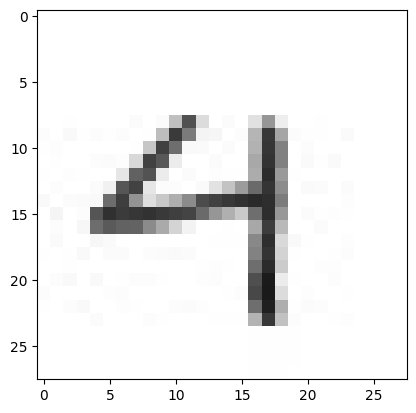

In [280]:
imag = Image.open('test3.jpg')
img = cv2.imread('test3.jpg')
plt.imshow(img)
plt.show()

In [281]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [282]:
print(len(img))

28


In [283]:
testim = np.array([])

In [284]:
print(testim)
okk = []

[]


In [285]:
for i in range(0, 28):
    for j in range(0, 28):
        if img[i][j][1]>200:
            okk.append([0])
        else:
            okk.append([255-img[i][j][1]])

In [286]:
print(len(okk))
data = np.array(okk)

784


Prediction:  [4]
Label:  4


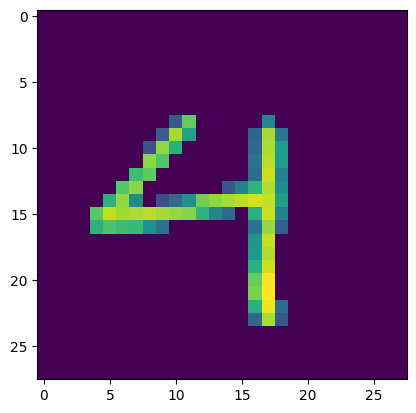

In [287]:
current_image = data/255
prediction = make_predictions(data/255, W1, b1, W2, b2)
label = 4
print("Prediction: ", prediction)
print("Label: ", label)
current_image = current_image.reshape((28, 28)) * 255
plt.imshow(current_image, interpolation='nearest')
plt.show()